In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Define the data
data = np.array([28, -44, 29, 30, 26, 27, 22, 23, 33, 16, 24, 40, 21, 31, 34, -2, 25, 19])
n = len(data)
print(f"Sample size: {n}")

Sample size: 18


In [12]:
# Step 1: Compute the test statistic (sample mean) on the original data
observed_mean = np.mean(data)  # T_0
print(f"Observed mean: {observed_mean}")

Observed mean: 21.22222222222222


In [14]:
# Step 2: Adjust the data to have mean = 33.02 (under H_0)
null_mean = 33.02
shift = null_mean - observed_mean
adjusted_data = data + shift
print("Shifted By :-" , shift)
print(f"Adjusted data mean:- {np.mean(adjusted_data)}")

Shifted By :- 11.797777777777782
Adjusted data mean:- 33.02000000000001


P-value: 0.008
Reject H_0: The mean is not 33.02


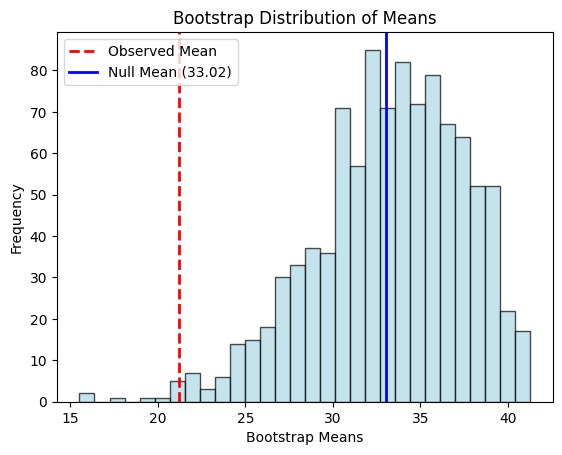

In [16]:
# Step 3: Bootstrap under the null hypothesis
B = 1000  # Number of bootstrap samples
bootstrap_means = np.zeros(B)

for i in range(B):
    # Sample with replacement from the adjusted data
    bootstrap_sample = np.random.choice(adjusted_data, size=n, replace=True)
    # Compute the mean of the bootstrap sample
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Step 4: Compute the p-value (two-sided test)
observed_diff = abs(observed_mean - null_mean)
bootstrap_diffs = abs(bootstrap_means - null_mean)
p_value = np.mean(bootstrap_diffs >= observed_diff)
print(f"P-value: {p_value}")

# Step 5: Decision at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject H_0: The mean is not 33.02")
else:
    print("Fail to reject H_0: The mean could be 33.02")


# Optional: Plot the bootstrap distribution
plt.hist(bootstrap_means, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(observed_mean, color='red', linestyle='--', linewidth=2, label='Observed Mean')
plt.axvline(null_mean, color='blue', linestyle='-', linewidth=2, label='Null Mean (33.02)')
plt.title('Bootstrap Distribution of Means')
plt.xlabel('Bootstrap Means')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('bootstrap_distribution.png')